## Import libraries

In [1]:
# Base libraries
import pandas as pd
import numpy as np
from pyforest import *

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


## Exploring the database

In [2]:
# Open the excel database 
# In Row the 184 countries and the years
health = pd.read_excel('C:/Users/igrav/Desktop/ironhack/Lecture/Week_9/Project/data_origine/World bank/Data_Health_Source4.xlsx')
pd.set_option('display.max_columns', None)
health.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Country Name,Country Code,Year,"Birth rate (per 1,000 people)","Cause of death, by communicable diseasesl and nutrition conditions (% of total)","Cause of death, by injury (% of total)","Cause of death, by non-communicable diseases (% of total)",Current health expenditure (% of GDP),"Current health expenditure per capita, PPP ( $)","Death rate (per 1,000 people)",Diabetes prevalence (% of population ages 20 to 79),Domestic general government health expenditure (% of GDP),"Domestic general government health expenditure per capita, PPP ($)","Domestic private health expenditure per capita, PPP ($)","External health expenditure per capita, PPP ($)","Fertility rate, total (births per woman)",GNI per capita (US$),"Hospital beds (per 1,000 people)",Human capital index (HCI) (scale 0-1),"Immunization, measles second dose (% of children)","Immunization, Pol3 (% children)","Incidence of HIV (per 1,000 population)","Incidence of tuberculosis (per 100,000 people)","Life expectancy at birth, total (years)",Lifetime risk of maternal death (%),"Literacy rate, adult total (% of people ages 15 and above)","Maternal mortality ratio ( per 100,000 live births)","Mortality caused by road traffic injury (per 100,000 people)","Mortality from CVD, cancer, diabetes or CRD (%)","Mortality rate, infant (per 1,000 live births)","Nurses (per 1,000 people)",Out-of-pocket expenditure (% of current health expenditure),"Out-of-pocket expenditure per capita, PPP ($)",People using drinking water services (%),"Physicians (per 1,000 people)",Population growth (annual %),"GDP per capita, PPP ($)",Population,GDP (B$),Prevalence of anemia among children (%),Prevalence of tobacco (%),Prevalence of HIV (%),Prevalence of overweight (% of adults),Prevalence of overweight ( % of children ),Public spending on education (% of GDP),Rural population (%),"School enrollment, tertiary (%)","Suicide mortality rate (per 100,000)",Total alcohol consumption per capita,% of adults with hypertension,"Tuberculosis death rate (per 100,000 people)","Unemployment, total (%)"
0,Afghanistan,AFG,2021,38.900842,40.157115,14.903117,44.939767,10.223393,163.917681,8.211684,10.90,0.535133,8.692245,125.905373,29.320065,5.755316,550.0,0.443125,0.394258,30.0,62.894737,0.028421,189.210526,61.295789,6.144000,37.266041,963.625,14.705556,38.061111,63.105263,0.3563,77.517930,125.873408,51.484575,0.236064,2.303412,6457.050021,3051010.0,19.700524,44.644444,26.45,0.1,18.873333,5.184211,3.30172,73.686,5.709476,4.405556,0.21,38.45,41.105263,13.283
1,Afghanistan,AFG,2012,37.690000,40.157115,14.903117,44.939767,7.897176,151.917984,7.645000,9.25,0.342887,6.596119,113.157953,32.163919,5.562000,630.0,0.530000,0.394258,33.0,67.000000,0.030000,189.000000,62.054000,5.023027,34.357446,858.000,13.800000,36.600000,59.500000,0.3563,74.486206,113.157953,53.403517,0.241400,3.407600,1848.700026,32269592.0,59.656796,43.500000,26.45,0.1,20.500000,5.300000,3.32000,75.840,7.397240,4.000000,0.21,40.20,44.000000,11.341
2,Afghanistan,AFG,2011,38.750000,40.157115,14.903117,44.939767,8.561907,143.091522,7.936000,7.60,0.480000,8.022033,104.821934,30.247552,5.770000,530.0,0.440000,0.394258,31.0,68.000000,0.030000,189.000000,61.553000,5.520806,31.448851,905.000,14.200000,37.100000,61.800000,0.3563,73.255173,104.821934,50.827846,0.251800,3.143106,1839.273579,31161378.0,57.314299,43.500000,26.45,0.1,19.900000,5.500000,3.46201,76.052,3.622260,4.100000,0.21,39.40,44.000000,11.054
3,Afghanistan,AFG,2013,36.670000,40.157115,14.903117,44.939767,8.805941,174.059479,7.380000,9.25,0.443358,8.763480,125.406128,39.889862,5.359000,650.0,0.530000,0.394258,38.0,64.000000,0.030000,189.000000,62.525000,4.538151,34.357446,810.000,14.000000,36.200000,57.300000,0.2495,72.047867,125.406128,56.014043,0.284600,3.494592,1838.960244,33370804.0,61.367582,43.500000,26.45,0.1,21.100000,5.200000,3.45446,75.627,5.709476,4.000000,0.21,41.00,43.000000,11.193
4,Afghanistan,AFG,2016,33.981000,40.157115,14.903117,44.939767,11.818562,234.140213,6.742000,9.25,0.600128,1

In [3]:
health.shape


(2606, 52)

## Pivot and Melt

In [4]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2606 entries, 0 to 2605
Data columns (total 52 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   Country Name                                                                     2606 non-null   object 
 1   Country Code                                                                     2606 non-null   object 
 2   Year                                                                             2606 non-null   int64  
 3   Birth rate (per 1,000 people)                                                    2606 non-null   float64
 4   Cause of death, by communicable diseasesl and nutrition conditions (% of total)  2606 non-null   float64
 5   Cause of death, by injury (% of total)                                           2606 non-null   float64
 6   Cause of

In [5]:
health = health.apply(lambda x : x.replace("..", np.nan))
health.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Country Name,Country Code,Year,"Birth rate (per 1,000 people)","Cause of death, by communicable diseasesl and nutrition conditions (% of total)","Cause of death, by injury (% of total)","Cause of death, by non-communicable diseases (% of total)",Current health expenditure (% of GDP),"Current health expenditure per capita, PPP ( $)","Death rate (per 1,000 people)",Diabetes prevalence (% of population ages 20 to 79),Domestic general government health expenditure (% of GDP),"Domestic general government health expenditure per capita, PPP ($)","Domestic private health expenditure per capita, PPP ($)","External health expenditure per capita, PPP ($)","Fertility rate, total (births per woman)",GNI per capita (US$),"Hospital beds (per 1,000 people)",Human capital index (HCI) (scale 0-1),"Immunization, measles second dose (% of children)","Immunization, Pol3 (% children)","Incidence of HIV (per 1,000 population)","Incidence of tuberculosis (per 100,000 people)","Life expectancy at birth, total (years)",Lifetime risk of maternal death (%),"Literacy rate, adult total (% of people ages 15 and above)","Maternal mortality ratio ( per 100,000 live births)","Mortality caused by road traffic injury (per 100,000 people)","Mortality from CVD, cancer, diabetes or CRD (%)","Mortality rate, infant (per 1,000 live births)","Nurses (per 1,000 people)",Out-of-pocket expenditure (% of current health expenditure),"Out-of-pocket expenditure per capita, PPP ($)",People using drinking water services (%),"Physicians (per 1,000 people)",Population growth (annual %),"GDP per capita, PPP ($)",Population,GDP (B$),Prevalence of anemia among children (%),Prevalence of tobacco (%),Prevalence of HIV (%),Prevalence of overweight (% of adults),Prevalence of overweight ( % of children ),Public spending on education (% of GDP),Rural population (%),"School enrollment, tertiary (%)","Suicide mortality rate (per 100,000)",Total alcohol consumption per capita,% of adults with hypertension,"Tuberculosis death rate (per 100,000 people)","Unemployment, total (%)"
0,Afghanistan,AFG,2021,38.900842,40.157115,14.903117,44.939767,10.223393,163.917681,8.211684,10.90,0.535133,8.692245,125.905373,29.320065,5.755316,550.0,0.443125,0.394258,30.0,62.894737,0.028421,189.210526,61.295789,6.144000,37.266041,963.625,14.705556,38.061111,63.105263,0.3563,77.517930,125.873408,51.484575,0.236064,2.303412,6457.050021,3051010.0,19.700524,44.644444,26.45,0.1,18.873333,5.184211,3.30172,73.686,5.709476,4.405556,0.21,38.45,41.105263,13.283
1,Afghanistan,AFG,2012,37.690000,40.157115,14.903117,44.939767,7.897176,151.917984,7.645000,9.25,0.342887,6.596119,113.157953,32.163919,5.562000,630.0,0.530000,0.394258,33.0,67.000000,0.030000,189.000000,62.054000,5.023027,34.357446,858.000,13.800000,36.600000,59.500000,0.3563,74.486206,113.157953,53.403517,0.241400,3.407600,1848.700026,32269592.0,59.656796,43.500000,26.45,0.1,20.500000,5.300000,3.32000,75.840,7.397240,4.000000,0.21,40.20,44.000000,11.341
2,Afghanistan,AFG,2011,38.750000,40.157115,14.903117,44.939767,8.561907,143.091522,7.936000,7.60,0.480000,8.022033,104.821934,30.247552,5.770000,530.0,0.440000,0.394258,31.0,68.000000,0.030000,189.000000,61.553000,5.520806,31.448851,905.000,14.200000,37.100000,61.800000,0.3563,73.255173,104.821934,50.827846,0.251800,3.143106,1839.273579,31161378.0,57.314299,43.500000,26.45,0.1,19.900000,5.500000,3.46201,76.052,3.622260,4.100000,0.21,39.40,44.000000,11.054
3,Afghanistan,AFG,2013,36.670000,40.157115,14.903117,44.939767,8.805941,174.059479,7.380000,9.25,0.443358,8.763480,125.406128,39.889862,5.359000,650.0,0.530000,0.394258,38.0,64.000000,0.030000,189.000000,62.525000,4.538151,34.357446,810.000,14.000000,36.200000,57.300000,0.2495,72.047867,125.406128,56.014043,0.284600,3.494592,1838.960244,33370804.0,61.367582,43.500000,26.45,0.1,21.100000,5.200000,3.45446,75.627,5.709476,4.000000,0.21,41.00,43.000000,11.193
4,Afghanistan,AFG,2016,33.981000,40.157115,14.903117,44.939767,11.818562,234.140213,6.742000,9.25,0.600128,1

In [6]:
health.isna().sum()/len(health)

Country Name                                                                       0.000000
Country Code                                                                       0.000000
Year                                                                               0.000000
Birth rate (per 1,000 people)                                                      0.000000
Cause of death, by communicable diseasesl and nutrition conditions (% of total)    0.000000
Cause of death, by injury (% of total)                                             0.000000
Cause of death, by non-communicable diseases (% of total)                          0.000000
Current health expenditure (% of GDP)                                              0.000000
Current health expenditure per capita, PPP ( $)                                    0.000000
Death rate (per 1,000 people)                                                      0.000000
Diabetes prevalence (% of population ages 20 to 79)                             

## Drop the unrelevant columns

In [7]:
# energy.drop(energy.columns.difference(['country', 'iso_code', 'year',  'population', 'gdp', 'greenhouse_gas_emissions', 'electricity_demand', ' primary_energy_consumption', ' renewables_consumption', ' carbon_intensity_elec', 'low_carbon_consumption', 'fossil_fuel_consumption', 'hydro_consumption', 'biofuel_consumption', 'wind_consumption', 'solar_consumption', 'nuclear_consumption', 'other_renewable_consumption', 'coal_consumption', 'oil_consumption', 'gas_consumption']), 1, inplace=True)
# energy2 = energy[energy.columns.difference(['gdp', 'population'])]


In [8]:
health.shape


(2606, 52)

## Rename & Create relevant new columns for further analysis (C02 per cap, ...)

In [9]:
health_features = health[health.columns.difference(['Country Name', 'Country Code'])].astype('float')
health_country = health[['Country Name', 'Country Code']]
health = pd.concat([health_country,health_features], axis=1)
health.info()

<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2606 entries, 0 to 2605
Data columns (total 52 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   Country Name                                                                     2606 non-null   object 
 1   Country Code                                                                     2606 non-null   object 
 2   % of adults with hypertension                                                    2606 non-null   float64
 3   Birth rate (per 1,000 people)                                                    2606 non-null   float64
 4   Cause of death, by communicable diseasesl and nutrition conditions (% of total)  2606 non-null   float64
 5   Cause of death, by injury (% of total)                                           2606 non-null   float64
 6   Cause of

In [10]:
health_rich = health[health['GDP per capita, PPP ($)']>20000]
health_rich.head()


,Country Name,Country Code,% of adults with hypertension,"Birth rate (per 1,000 people)","Cause of death, by communicable diseasesl and nutrition conditions (% of total)","Cause of death, by injury (% of total)","Cause of death, by non-communicable diseases (% of total)",Current health expenditure (% of GDP),"Current health expenditure per capita, PPP ( $)","Death rate (per 1,000 people)",Diabetes prevalence (% of population ages 20 to 79),Domestic general government health expenditure (% of GDP),"Domestic general government health expenditure per capita, PPP ($)","Domestic private health expenditure per capita, PPP ($)","External health expenditure per capita, PPP ($)","Fertility rate, total (births per woman)",GDP (B$),"GDP per capita, PPP ($)",GNI per capita (US$),"Hospital beds (per 1,000 people)",Human capital index (HCI) (scale 0-1),"Immunization, Pol3 (% children)","Immunization, measles second dose (% of children)","Incidence of HIV (per 1,000 population)","Incidence of tuberculosis (per 100,000 people)","Life expectancy at birth, total (years)",Lifetime risk of maternal death (%),"Literacy rate, adult total (% of people ages 15 and above)","Maternal mortality ratio ( per 100,000 live births)","Mortality caused by road traffic injury (per 100,000 people)","Mortality from CVD, cancer, diabetes or CRD (%)","Mortality rate, infant (per 1,000 live births)","Nurses (per 1,000 people)",Out-of-pocket expenditure (% of current health expenditure),"Out-of-pocket expenditure per capita, PPP ($)",People using drinking water services (%),"Physicians (per 1,000 people)",Population,Population growth (annual %),Prevalence of HIV (%),Prevalence of anemia among children (%),Prevalence of overweight ( % of children ),Prevalence of overweight (% of adults),Prevalence of tobacco (%),Public spending on education (% of GDP),Rural population (%),"School enrollment, tertiary (%)","Suicide mortality rate (per 100,000)",Total alcohol consumption per capita,"Tuberculosis death rate (per 100,000 people)","Unemployment, total (%)",Year


## Check, fill or drop the missing value per country and per columns

In [11]:
health.isna().sum()

Country Name                                                                         0
Country Code                                                                         0
% of adults with hypertension                                                        0
Birth rate (per 1,000 people)                                                        0
Cause of death, by communicable diseasesl and nutrition conditions (% of total)      0
Cause of death, by injury (% of total)                                               0
Cause of death, by non-communicable diseases (% of total)                            0
Current health expenditure (% of GDP)                                                0
Current health expenditure per capita, PPP ( $)                                      0
Death rate (per 1,000 people)                                                        0
Diabetes prevalence (% of population ages 20 to 79)                                 19
Domestic general government health expendit

In [12]:
my_cols = health[health.columns.difference(['Country Name', 'Country Code'])]
List  = my_cols.columns.to_list()

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
X = imputer.fit_transform(my_cols)
health2 = pd.DataFrame(X)
health2.columns = List
health2 = health2.astype(int)
health2[['Country Name', 'Country Code']]=health[['Country Name', 'Country Code']]
health = health2


<IPython.core.display.Javascript object>

In [13]:
health = health.dropna()
health.isna().sum()

% of adults with hypertension                                                      0
Birth rate (per 1,000 people)                                                      0
Cause of death, by communicable diseasesl and nutrition conditions (% of total)    0
Cause of death, by injury (% of total)                                             0
Cause of death, by non-communicable diseases (% of total)                          0
Current health expenditure (% of GDP)                                              0
Current health expenditure per capita, PPP ( $)                                    0
Death rate (per 1,000 people)                                                      0
Diabetes prevalence (% of population ages 20 to 79)                                0
Domestic general government health expenditure (% of GDP)                          0
Domestic general government health expenditure per capita, PPP ($)                 0
Domestic private health expenditure per capita, PPP  ($)         

In [14]:
health.shape

(2606, 52)

# Selecting columns&rows, check correlation, train, split and run Linear model

## Distribution plots of numerical variables

In [15]:
# Get the numerical variables from our dataset.
numerical = health.select_dtypes(include=np.number)
numerical.head()

<IPython.core.display.Javascript object>

,% of adults with hypertension,"Birth rate (per 1,000 people)","Cause of death, by communicable diseasesl and nutrition conditions (% of total)","Cause of death, by injury (% of total)","Cause of death, by non-communicable diseases (% of total)",Current health expenditure (% of GDP),"Current health expenditure per capita, PPP ( $)","Death rate (per 1,000 people)",Diabetes prevalence (% of population ages 20 to 79),Domestic general government health expenditure (% of GDP),"Domestic general government health expenditure per capita, PPP ($)","Domestic private health expenditure per capita, PPP ($)","External health expenditure per capita, PPP ($)","Fertility rate, total (births per woman)",GDP (B$),"GDP per capita, PPP ($)",GNI per capita (US$),"Hospital beds (per 1,000 people)",Human capital index (HCI) (scale 0-1),"Immunization, Pol3 (% children)","Immunization, measles second dose (% of children)","Incidence of HIV (per 1,000 population)","Incidence of tuberculosis (per 100,000 people)","Life expectancy at birth, total (years)",Lifetime risk of maternal death (%),"Literacy rate, adult total (% of people ages 15 and above)","Maternal mortality ratio ( per 100,000 live births)","Mortality caused by road traffic injury (per 100,000 people)","Mortality from CVD, cancer, diabetes or CRD (%)","Mortality rate, infant (per 1,000 live births)","Nurses (per 1,000 people)",Out-of-pocket expenditure (% of current health expenditure),"Out-of-pocket expenditure per capita, PPP ($)",People using drinking water services (%),"Physicians (per 1,000 people)",Population,Population growth (annual %),Prevalence of HIV (%),Prevalence of anemia among children (%),Prevalence of overweight ( % of children ),Prevalence of overweight (% of adults),Prevalence of tobacco (%),Public spending on education (% of GDP),Rural population (%),"School enrollment, tertiary (%)","Suicide mortality rate (per 100,000)",Total alcohol consumption per capita,"Tuberculosis death rate (per 100,000 people)","Unemployment, total (%)",Year
0,38,38,40,14,44,10,163,8,10,0,8,125,29,5,19,6457,550,0,0,62,30,0,189,61,6,37,963,14,38,63,0,77,125,51,0,3051010,2,0,44,5,18,26,3,73,5,4,0,41,13,2021
1,40,37,40,14,44,7,151,7,9,0,6,113,32,5,59,1848,630,0,0,67,33,0,189,62,5,34,858,13,36,59,0,74,113,53,0,32269592,3,0,43,5,20,26,3,75,7,4,0,44,11,2012
2,39,38,40,14,44,8,143,7,7,0,8,104,30,5,57,1839,530,0,0,68,31,0,189,61,5,31,905,14,37,61,0,73,104,50,0,31161378,3,0,43,5,19,26,3,76,3,4,0,44,11,2011
3,41,36,40,14,44,8,174,7,9,0,8,125,39,5,61,1838,650,0,0,64,38,0,189,62,4,34,810,14,36,57,0,72,125,56,0,33370804,3,0,43,5,21,26,3,75,5,4,0,43,11,2013
4,43,33,40,14,44,11,234,6,9,0,11,177,44,4,0,1829,550,0,0,71,40,0,189,63,3,34,673,14,35,51,0,75,177,64,0,36296111,2,0,43,4,23,26,3,74,5,4,0,34,11,2016


C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


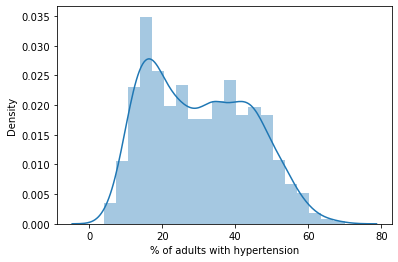

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


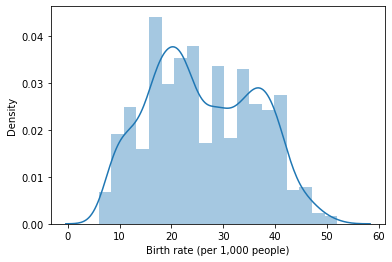

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


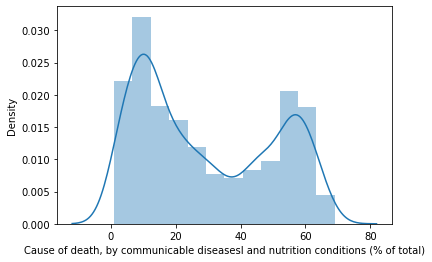

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


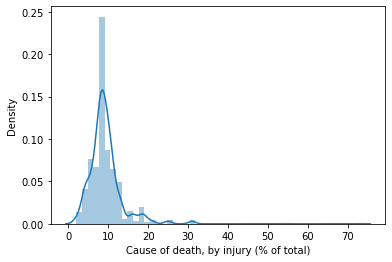

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


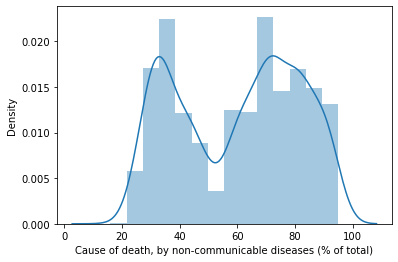

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


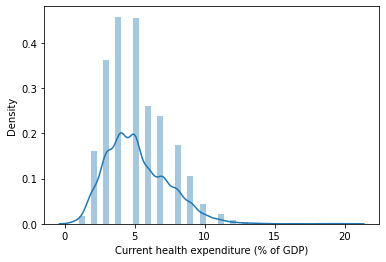

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


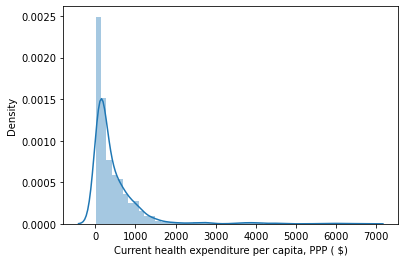

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


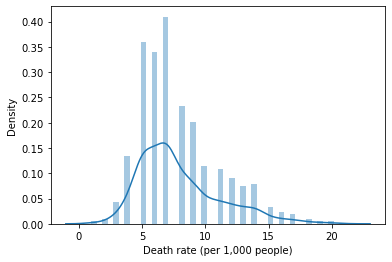

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


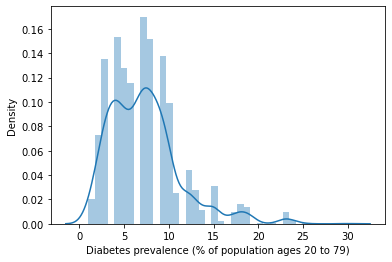

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


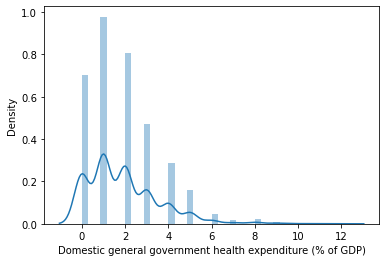

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


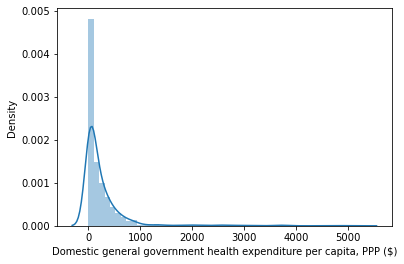

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


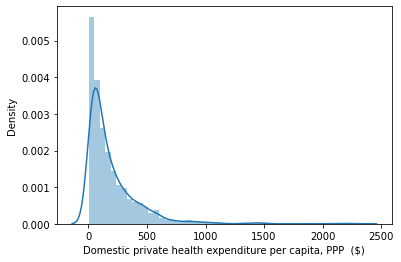

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


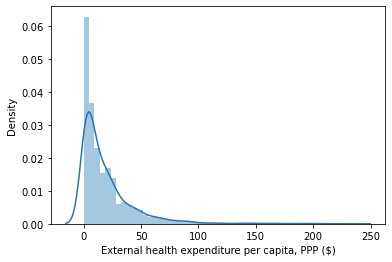

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


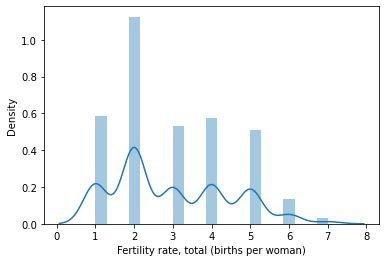

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


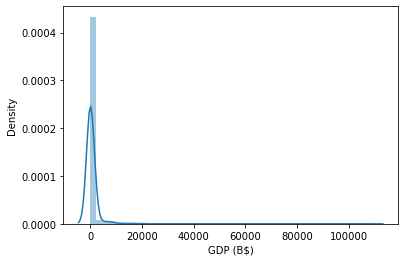

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


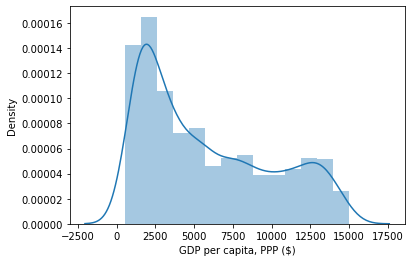

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


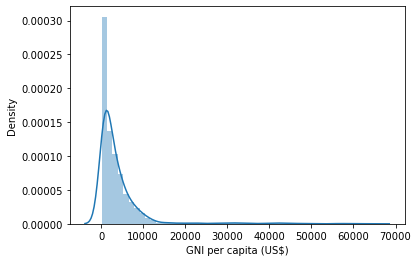

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


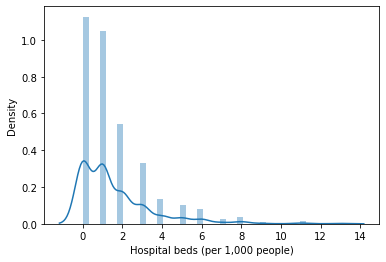

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


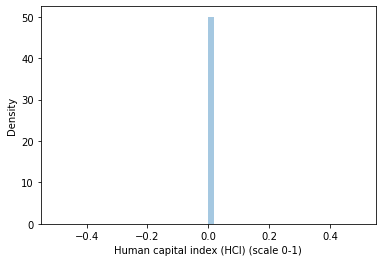

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


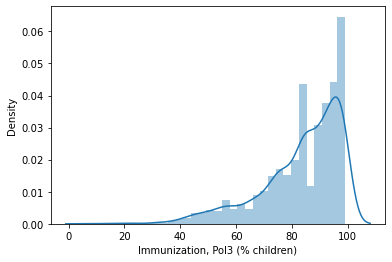

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


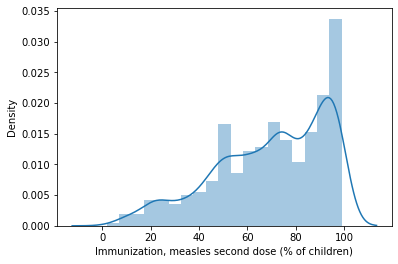

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


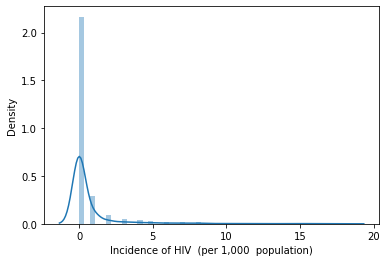

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


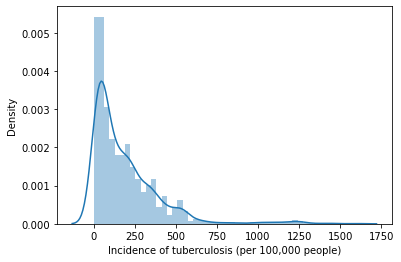

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


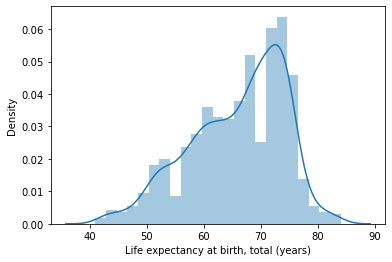

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


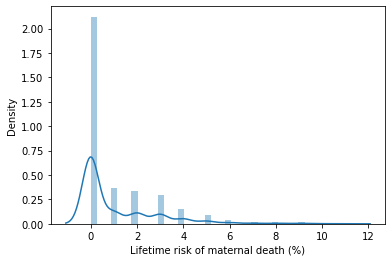

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


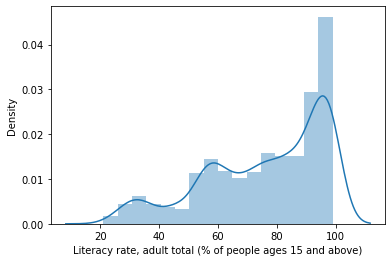

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


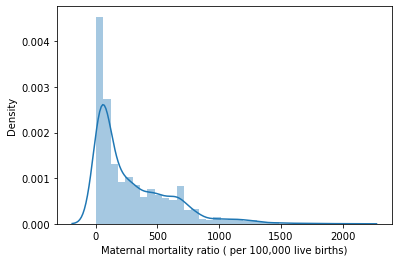

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


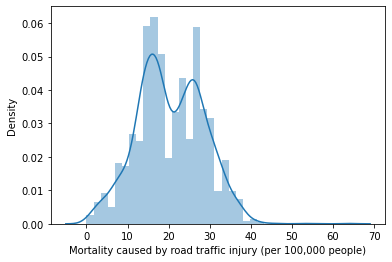

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


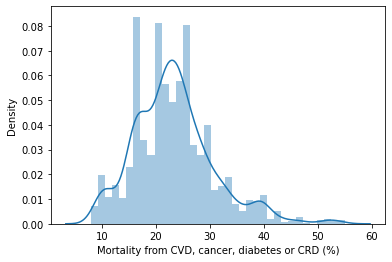

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


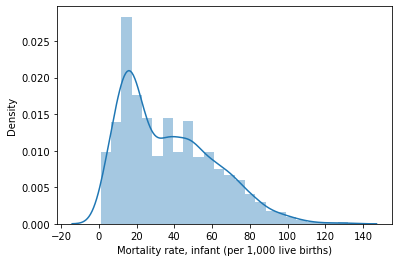

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


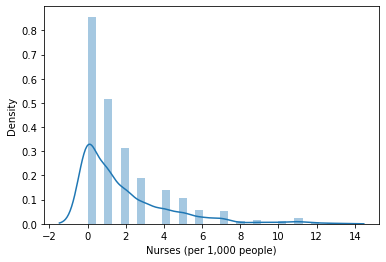

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


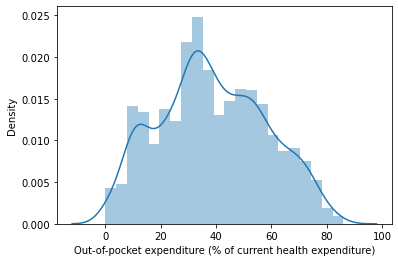

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


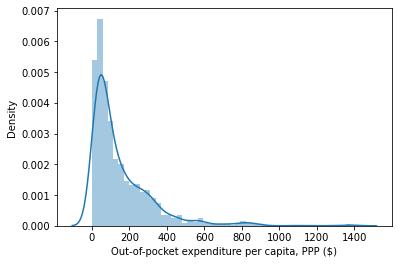

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


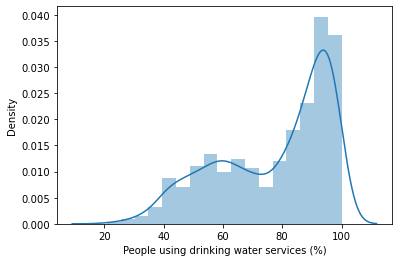

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


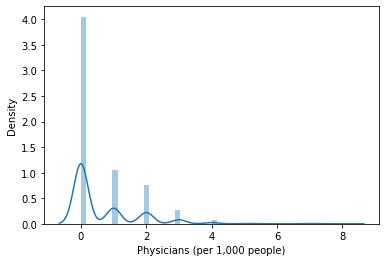

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


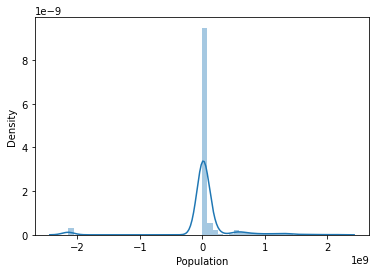

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


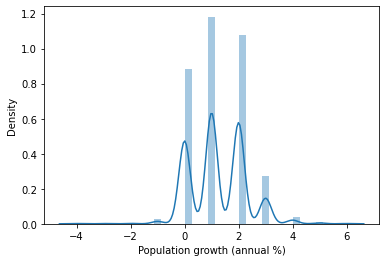

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


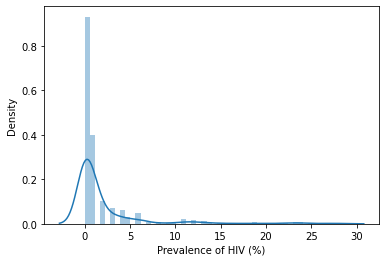

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


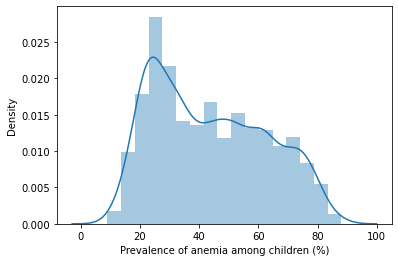

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


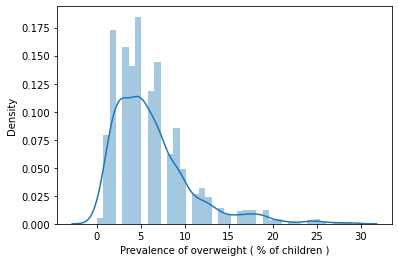

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


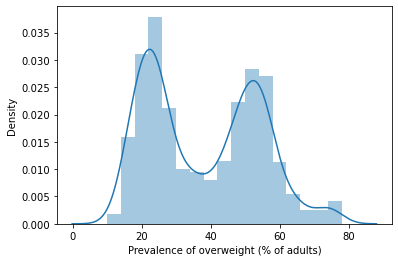

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


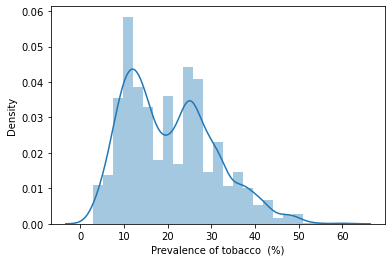

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


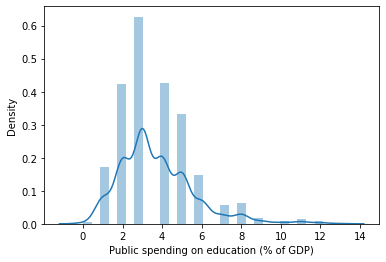

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


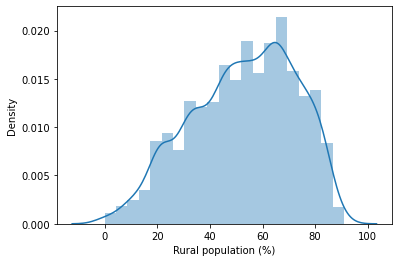

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


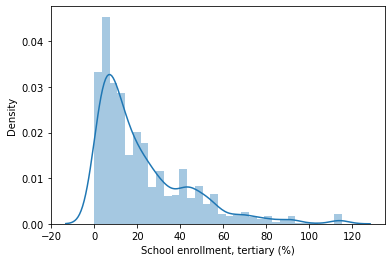

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


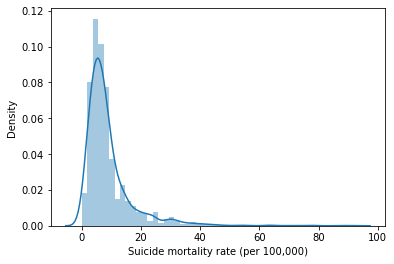

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


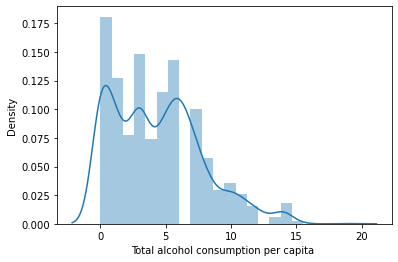

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


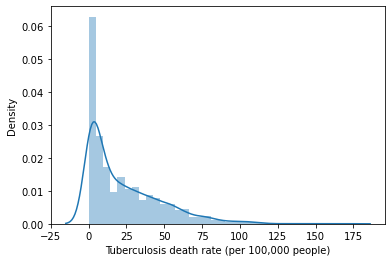

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


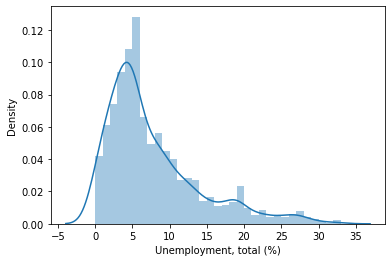

C:\Users\igrav\anaconda3\envs\energy_project1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


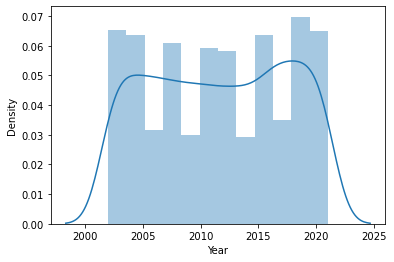

In [16]:
# Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
for column in numerical:
    sns.distplot(numerical[column])
    plt.show()

## Heatmap to check correlation, (output : 'Life expectancy at birth')

,% of adults with hypertension,"Birth rate (per 1,000 people)","Cause of death, by communicable diseasesl and nutrition conditions (% of total)","Cause of death, by injury (% of total)","Cause of death, by non-communicable diseases (% of total)",Current health expenditure (% of GDP),"Current health expenditure per capita, PPP ( $)","Death rate (per 1,000 people)",Diabetes prevalence (% of population ages 20 to 79),Domestic general government health expenditure (% of GDP),"Domestic general government health expenditure per capita, PPP ($)","Domestic private health expenditure per capita, PPP ($)","External health expenditure per capita, PPP ($)","Fertility rate, total (births per woman)",GDP (B$),"GDP per capita, PPP ($)",GNI per capita (US$),"Hospital beds (per 1,000 people)",Human capital index (HCI) (scale 0-1),"Immunization, Pol3 (% children)","Immunization, measles second dose (% of children)","Incidence of HIV (per 1,000 population)","Incidence of tuberculosis (per 100,000 people)","Life expectancy at birth, total (years)",Lifetime risk of maternal death (%),"Literacy rate, adult total (% of people ages 15 and above)","Maternal mortality ratio ( per 100,000 live births)","Mortality caused by road traffic injury (per 100,000 people)","Mortality from CVD, cancer, diabetes or CRD (%)","Mortality rate, infant (per 1,000 live births)","Nurses (per 1,000 people)",Out-of-pocket expenditure (% of current health expenditure),"Out-of-pocket expenditure per capita, PPP ($)",People using drinking water services (%),"Physicians (per 1,000 people)",Population,Population growth (annual %),Prevalence of HIV (%),Prevalence of anemia among children (%),Prevalence of overweight ( % of children ),Prevalence of overweight (% of adults),Prevalence of tobacco (%),Public spending on education (% of GDP),Rural population (%),"School enrollment, tertiary (%)","Suicide mortality rate (per 100,000)",Total alcohol consumption per capita,"Tuberculosis death rate (per 100,000 people)","Unemployment, total (%)",Year
0,38,38,40,14,44,10,163,8,10,0,8,125,29,5,19,6457,550,0,0,62,30,0,189,61,6,37,963,14,38,63,0,77,125,51,0,3051010,2,0,44,5,18,26,3,73,5,4,0,41,13,2021
1,40,37,40,14,44,7,151,7,9,0,6,113,32,5,59,1848,630,0,0,67,33,0,189,62,5,34,858,13,36,59,0,74,113,53,0,32269592,3,0,43,5,20,26,3,75,7,4,0,44,11,2012
2,39,38,40,14,44,8,143,7,7,0,8,104,30,5,57,1839,530,0,0,68,31,0,189,61,5,31,905,14,37,61,0,73,104,50,0,31161378,3,0,43,5,19,26,3,76,3,4,0,44,11,2011
3,41,36,40,14,44,8,174,7,9,0,8,125,39,5,61,1838,650,0,0,64,38,0,189,62,4,34,810,14,36,57,0,72,125,56,0,33370804,3,0,43,5,21,26,3,75,5,4,0,43,11,2013
4,43,33,40,14,44,11,234,6,9,0,11,177,44,4,0,1829,550,0,0,71,40,0,189,63,3,34,673,14,35,51,0,75,177,64,0,36296111,2,0,43,4,23,26,3,74,5,4,0,34,11,2016


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

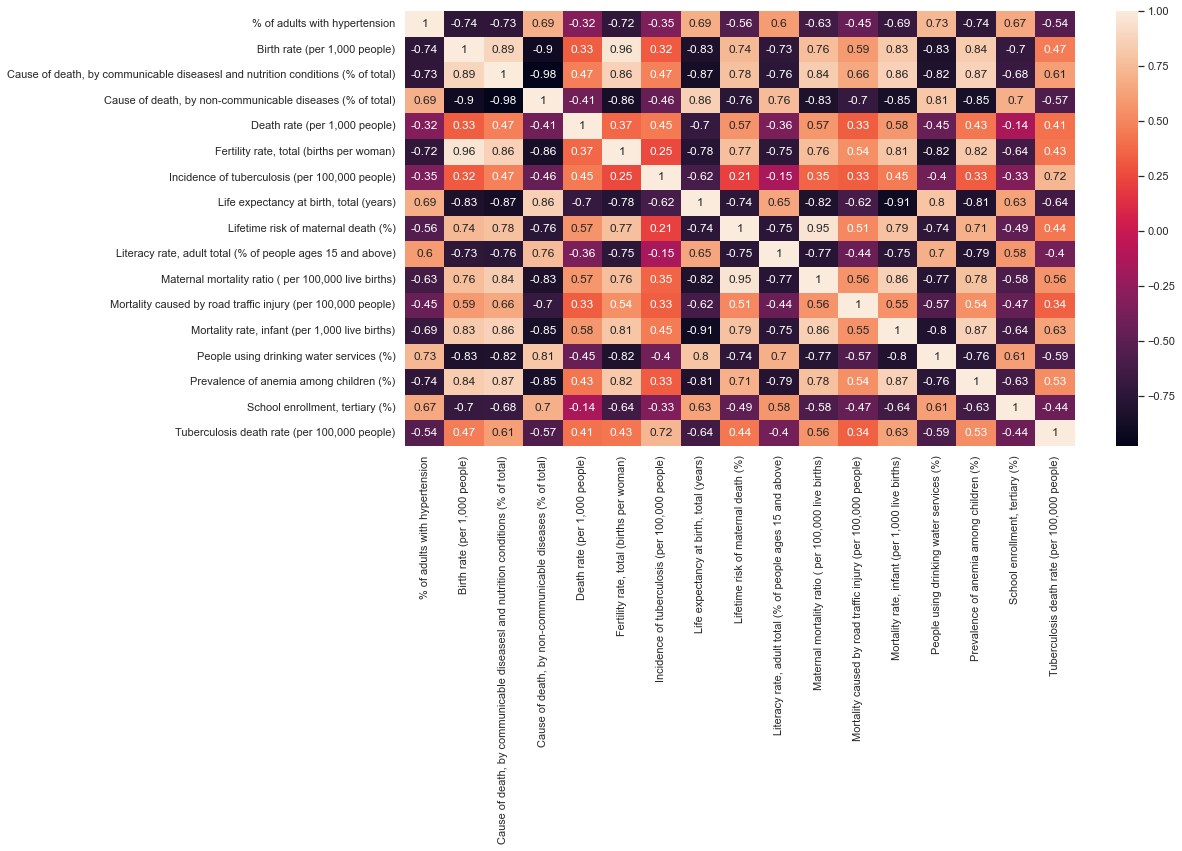

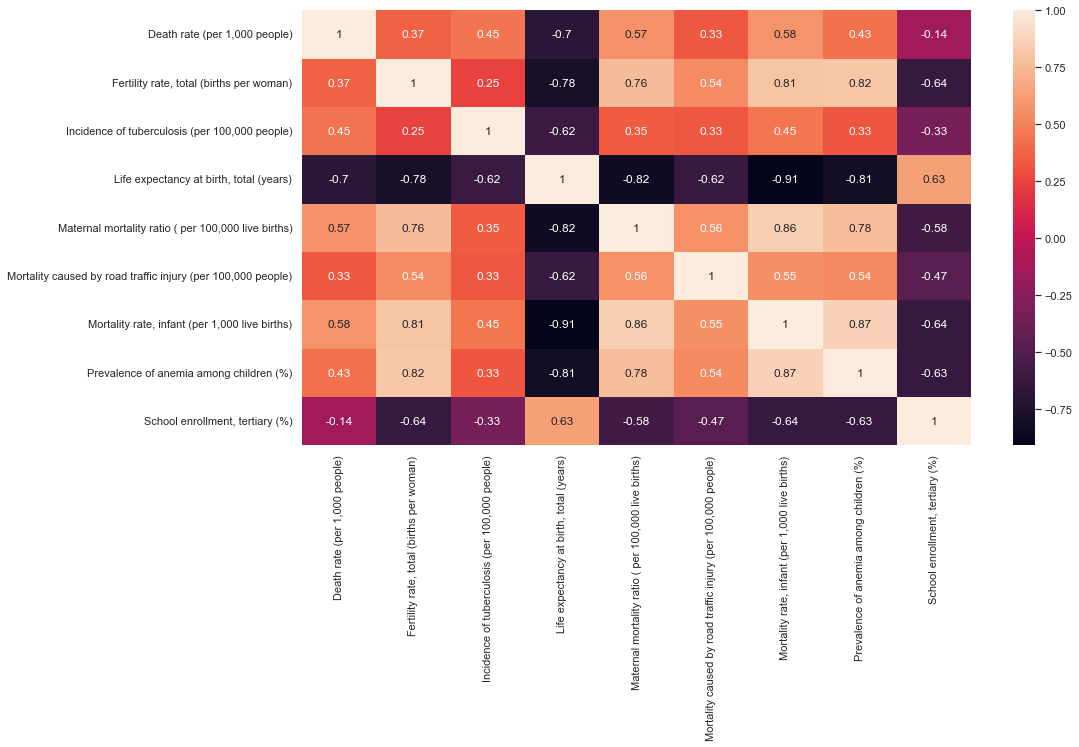

(2606, 9)

In [17]:
num = health.select_dtypes("number")
display(num.head())

cf = 0.6

columns = []
corr_matrix = num.corr()

for col in num.columns:
        if (abs(corr_matrix.loc[col,'Life expectancy at birth, total (years)']) >= cf):
            columns.append(col)
numerical_trimmed = pd.DataFrame(num, columns=columns)
pd.set_option('display.max_columns', None)
corr_matrix2 = numerical_trimmed.corr()
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(corr_matrix2, annot=True)
plt.show()

# numerical_trimmed = numerical_trimmed.drop(['Tuberculosis death rate (per 100,000 people)',"Death rate (per 1,000 people)", "Prevalence of HIV (%)","Lifetime risk of maternal death (%)","% of adults with hypertension", "GDP per capita, PPP ($)", "Birth rate (per 1,000 people)", "People using drinking water services (%)", "Cause of death, by non-communicable diseases (% of total)","Human capital index (HCI) (scale 0-1)"], axis = 1)
# corr_matrix2 = numerical_trimmed.corr()
# sns.set(rc={'figure.figsize':(15,8)})
# sns.heatmap(corr_matrix2, annot=True)
# plt.show()

numerical_trimmed = numerical_trimmed.drop(['Tuberculosis death rate (per 100,000 people)', "% of adults with hypertension", "Cause of death, by communicable diseasesl and nutrition conditions (% of total)",'People using drinking water services (%)', "Literacy rate, adult total (% of people ages 15 and above)", "Lifetime risk of maternal death (%)", "Birth rate (per 1,000 people)", "Cause of death, by non-communicable diseases (% of total)"], axis = 1)
corr_matrix2 = numerical_trimmed.corr()
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(corr_matrix2, annot=True)
plt.show()

numerical_trimmed.shape

## We keep 9 columns out of 15
#### 1 Output to predict : Life expectancy at birth (years)
####  8 Features : those which has highest correlation to output and the lowest to each other to minimize the Noise & Overfitting

In [18]:
health2 =numerical_trimmed
health2.head()

,"Death rate (per 1,000 people)","Fertility rate, total (births per woman)","Incidence of tuberculosis (per 100,000 people)","Life expectancy at birth, total (years)","Maternal mortality ratio ( per 100,000 live births)","Mortality caused by road traffic injury (per 100,000 people)","Mortality rate, infant (per 1,000 live births)",Prevalence of anemia among children (%),"School enrollment, tertiary (%)"
0,8,5,189,61,963,14,63,44,5
1,7,5,189,62,858,13,59,43,7
2,7,5,189,61,905,14,61,43,3
3,7,5,189,62,810,14,57,43,5
4,6,4,189,63,673,14,51,43,5


### Extraction dataframe for data Viz on Tableau

In [34]:
health3 = pd.concat([health["Country Name"], health2], axis=1)
health3.to_excel("Health_Developing_tableau.xlsx")

<IPython.core.display.Javascript object>

In [20]:
health['Life expectancy at birth, total (years)'].describe()

count    2606.000000
mean       65.946662
std         8.339292
min        41.000000
25%        60.000000
50%        68.000000
75%        73.000000
max        84.000000
Name: Life expectancy at birth, total (years), dtype: float64

## Train/test/split data

In [21]:
### X,y split

y = health2["Life expectancy at birth, total (years)"]
x = health2.drop(["Life expectancy at birth, total (years)"], axis = 1)

In [22]:
### Train-test split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 80)
print(x_train.shape)
print(x_test.shape)

(2084, 8)
(522, 8)


## Scaling & transformation

In [23]:
### Normaliyation by columns 

transformer = MinMaxScaler().fit(x_train)
x_train_norm = transformer.transform(x_train)
x_train_norm = pd.DataFrame(x_train_norm, columns=x_train.columns)
x_train_norm

<IPython.core.display.Javascript object>

,"Death rate (per 1,000 people)","Fertility rate, total (births per woman)","Incidence of tuberculosis (per 100,000 people)","Maternal mortality ratio ( per 100,000 live births)","Mortality caused by road traffic injury (per 100,000 people)","Mortality rate, infant (per 1,000 live births)",Prevalence of anemia among children (%),"School enrollment, tertiary (%)"
0,0.210526,0.333333,0.083648,0.011747,0.281250,0.286822,0.329114,0.201754
1,0.263158,0.000000,0.159119,0.093973,0.250000,0.193798,0.443038,0.096491
2,0.473684,0.000000,0.010063,0.001532,0.062500,0.007752,0.088608,0.052632
3,0.578947,0.666667,0.142767,0.637385,0.359375,0.573643,0.658228,0.000000
4,0.684211,0.666667,0.220126,0.424413,0.453125,0.651163,0.759494,0.043860
...,...,...,...,...,...,...,...,...
2079,0.526316,0.666667,0.142767,0.555669,0.484375,0.480620,0.620253,0.000000
2080,0.157895,0.000000,0.008805,0.016854,0.250000,0.062016,0.126582,0.429825
2081,0.263158,0.500000,0.159119,0.330439,0.484375,0.271318,0.594937,0.026316
2082,0.263158,0.166667,0.027673,0.036261,0.265625,0.100775,0.139241,0.429825


In [24]:
transformer = MinMaxScaler().fit(x_test)
x_test_norm = transformer.transform(x_test)
x_test_norm = pd.DataFrame(x_test_norm, columns=x_test.columns)
x_test_norm

<IPython.core.display.Javascript object>

,"Death rate (per 1,000 people)","Fertility rate, total (births per woman)","Incidence of tuberculosis (per 100,000 people)","Maternal mortality ratio ( per 100,000 live births)","Mortality caused by road traffic injury (per 100,000 people)","Mortality rate, infant (per 1,000 live births)",Prevalence of anemia among children (%),"School enrollment, tertiary (%)"
0,0.60,0.333333,0.408433,0.294514,0.700,0.519084,0.493506,0.060870
1,0.55,0.833333,0.241661,0.171800,0.650,0.603053,0.649351,0.034783
2,0.30,0.333333,0.004405,0.028393,0.225,0.076336,0.298701,0.086957
3,0.20,0.333333,0.003147,0.027430,0.325,0.099237,0.311688,0.147826
4,0.40,0.000000,0.042165,0.014437,0.400,0.122137,0.155844,0.443478
...,...,...,...,...,...,...,...,...
517,0.00,0.000000,0.013216,0.003369,0.200,0.038168,0.129870,0.130435
518,0.35,0.000000,0.009440,0.007700,0.250,0.053435,0.246753,0.513043
519,0.35,0.500000,0.075519,0.207411,0.575,0.389313,0.545455,0.130435
520,0.20,0.500000,0.050975,0.100096,0.425,0.175573,0.441558,0.095652


## Apply the linear model & results

In [25]:

lm = LinearRegression()
lm.fit(x_train_norm, y_train)
y_pred_train = lm.predict(x_train_norm)
y_pred_test = lm.predict(x_test_norm)
y_pred_train = lm.predict(x_train_norm)
y_pred_test = lm.predict(x_test_norm)
r2_train = r2_score(y_pred_train, y_train)
r2_test = r2_score(y_pred_test, y_test)
mse_train = mean_squared_error(y_pred_train, y_train)
mse_test = mean_squared_error(y_pred_test, y_test)
mae_train = mean_absolute_error(y_pred_train, y_train)
mae_test = mean_absolute_error(y_pred_test, y_test)
mape_train = mean_absolute_percentage_error(y_pred_train, y_train)
mape_test = mean_absolute_percentage_error(y_pred_test, y_test)


print('\nResult model with split in ', '70/30')
print("R2 score of trained dataset is", round(r2_train,3))
print("R2 score of test dataset is", round(r2_test,3))

print("Mean absolute percentage error of train dataset is", round(mape_train, 2))
print("Mean absolute percentage error of test dataset is", round(mape_test, 2))



Result model with split in  70/30
R2 score of trained dataset is 0.938
R2 score of test dataset is 0.941
Mean absolute percentage error of train dataset is 0.02
Mean absolute percentage error of test dataset is 0.03


## Apply DecisionTreeRegressor & Results

In [26]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(max_depth=10,
                             min_samples_split=10,
                             min_samples_leaf =5,
                             random_state = 42)
regr.fit(x_train, y_train)
print("Train data R2 was: {:.2f}".format(regr.score(x_train, y_train)))
print("Test data R2 was: {:.2f}".format(regr.score(x_test, y_test)))

Train data R2 was: 0.99
Test data R2 was: 0.98


## Apply KNeighborsRegressor & Results

In [27]:
from sklearn.neighbors import KNeighborsRegressor
regr = KNeighborsRegressor(n_neighbors=3)
regr.fit(x_train, y_train)
print("Train data R2 was: {:.2f}".format(regr.score(x_train, y_train)))
print("Test data R2 was: {:.2f}".format(regr.score(x_test, y_test)))

Train data R2 was: 0.98
Test data R2 was: 0.94


# Hyperparameter search

## Apply RandomForestRegressor + GridSearchCV & Result

In [28]:
from sklearn.model_selection import GridSearchCV

max_depth_choices= [8,10,12]
criterion_choices = ['squared_error','absolute_error'] 
min_samples_split_choices = [8,10,12] 
min_samples_leaf_choices = [5,6,7] 
# Create the  grid 
grid = {'max_depth': max_depth_choices,
        'criterion': criterion_choices,
        'min_samples_split': min_samples_split_choices,
        'min_samples_leaf': min_samples_leaf_choices}
# Instantiate the grid search model object
model = RandomForestRegressor()
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 5)
# Fit the grid search to the data
grid_search.fit(x_train, y_train)
grid_search.best_params_

<IPython.core.display.Javascript object>

{'criterion': 'squared_error',
 'max_depth': 12,
 'min_samples_leaf': 5,
 'min_samples_split': 8}

### More detailed search : optimization parameters

In [29]:
max_depth_choices= [11,12,13]
criterion_choices = ['squared_error','absolute_error'] 
min_samples_split_choices = [9,10,11] 
min_samples_leaf_choices = [4,5,6] 
# Create the  grid 
grid = {'max_depth': max_depth_choices,
        'criterion': criterion_choices,
        'min_samples_split': min_samples_split_choices,
        'min_samples_leaf': min_samples_leaf_choices}
# Instantiate the grid search model object
model = RandomForestRegressor()
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 5)
# Fit the grid search to the data
grid_search.fit(x_train, y_train)
grid_search.best_params_

<IPython.core.display.Javascript object>

{'criterion': 'squared_error',
 'max_depth': 13,
 'min_samples_leaf': 4,
 'min_samples_split': 9}

## Apply RandomForestRegressor model & Results

In [30]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(max_depth=12,
                             min_samples_split = 9,
                             min_samples_leaf =4,
                             max_samples=.9,
                             random_state = 42)
clf.fit(x_train_norm, y_train)

print("The R2 for the Random Forest in the TRAIN set is {:.2f}".format(clf.score(x_train_norm, y_train)))
print("The R2 for the Random Forest in the TEST  set is {:.2f}".format(clf.score(x_test_norm, y_test)))

y_pred = clf.predict(x_test_norm)
y_pred = clf.predict(x_test_norm)
print('\n\n Which feature impact the life expectancy?')
column_relevance = list(zip(np.abs(lm.coef_), x_train_norm.columns, np.round_(lm.coef_)))
column_relevance.sort(reverse=True)
column_relevance = [(item[1],item[-1]) for item in column_relevance]
column_relevance

The R2 for the Random Forest in the TRAIN set is 0.99
The R2 for the Random Forest in the TEST  set is 0.97


 Which feature impact the life expectancy?


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[('Incidence of tuberculosis (per 100,000 people)', -14.0),
 ('Death rate (per 1,000 people)', -13.0),
 ('Mortality rate, infant (per 1,000 live births)', -12.0),
 ('Fertility rate, total (births per woman)', -7.0),
 ('Mortality caused by road traffic injury (per 100,000 people)', -6.0),
 ('School enrollment, tertiary (%)', 5.0),
 ('Prevalence of anemia among children (%)', -3.0),
 ('Maternal mortality ratio ( per 100,000 live births)', -1.0)]

## Apply RandomForestClassifier + cross_val_score & Result

In [31]:
from sklearn.model_selection import cross_val_score

y_true = y_train
clf = RandomForestRegressor(max_depth=11,
                             min_samples_split = 9,
                             min_samples_leaf =4,
                             max_samples=.9,
                             random_state = 42)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

cross_val_scores = cross_val_score(clf, x_train, y_train, cv=5)

print("The mean R2 of the folds was {:.2f}".format(np.mean(cross_val_scores)))

<IPython.core.display.Javascript object>

The mean R2 of the folds was 0.98


## RandomizedSearchCV

In [32]:
from sklearn.model_selection import RandomizedSearchCV

max_depth_choices= [8,10,12]
criterion_choices = ['squared_error','absolute_error'] 
min_samples_split_choices = [8,10,12] 
min_samples_leaf_choices = [5,6,7] 
# Create the  grid 
random_grid = {'max_depth': max_depth_choices,
        'criterion': criterion_choices,
        'min_samples_split': min_samples_split_choices,
        'min_samples_leaf': min_samples_leaf_choices}
# Instantiate the grid search model object
model = RandomForestRegressor()
random_search = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter=25, cv = 5, n_jobs = 10) 
random_search.fit(x_train, y_train)
random_search.best_params_

{'min_samples_split': 8,
 'min_samples_leaf': 5,
 'max_depth': 12,
 'criterion': 'squared_error'}